# **Indexing and Sorting**
---
> **Note that an `index` is the _label_ for a row in a `DataFrame` or label for different `Series` values.** (Could be the names of a country, a date, e.t.c; just whatever makes sense for a given Dataset)  
* `DataFrame.sort_values([col_name or list of col_names])` is used to sort a DataFrame based on a particular column or columns
* `DataFrame.sort_index()` is used to sort the DataFrame based on the index
* `Series.sort_values()` and `Series.sort_index()` works the same way

>> Parameters:
>+ `ascending = True / False`
>+ `inplace = True / Fasle`

### Parsing the Datasets into DataFrames

In [45]:
# Parse the Datasets into DataFrames
import pandas as pd
bitcoin = pd. read_csv("/content/coin_Bitcoin.csv")
happiness = pd.read_csv("/content/world-happiness-report-2021.csv")
houses = pd.read_csv("/content/kc_house_data.csv")
titanic = pd.read_csv("/content/titanic.csv")
# Note that the index assigned to the DataFrame is a RangeIndex (0 - 2991)
bitcoin.index

# So what if you wanna change the index to the Date column?

RangeIndex(start=0, stop=2991, step=1)

### `DataFrame.set_index()`
+ Used to set the `DataFrame` index using existing columns ***after*** the DataFrame has already been imported  
+ A list can be passed to the function in case of multi-indexing  
+ Returns a new `DataFrame` with a new index, unless the parameter `inplace` is set to `True` like such: `inplace = True`. This would alter the original DataFrame and keep the changes

In [46]:
bitcoin.set_index("Date").head(3) # Makes a copy of the original df, but with new index

,SNo,Name,Symbol,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,,,,
2013-04-29 23:59:59,1,Bitcoin,BTC,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09
2013-04-30 23:59:59,2,Bitcoin,BTC,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09
2013-05-01 23:59:59,3,Bitcoin,BTC,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09


In [47]:
bitcoin.head(3)
# See, the index never changed in the original DataFrame, but that can be changed

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000,116.989998,0.0,1.298955e+09


In [48]:
bitcoin.set_index("Date", inplace=True)

In [49]:
# Check this out now.
bitcoin.index

Index(['2013-04-29 23:59:59', '2013-04-30 23:59:59', '2013-05-01 23:59:59',
       '2013-05-02 23:59:59', '2013-05-03 23:59:59', '2013-05-04 23:59:59',
       '2013-05-05 23:59:59', '2013-05-06 23:59:59', '2013-05-07 23:59:59',
       '2013-05-08 23:59:59',
       ...
       '2021-06-27 23:59:59', '2021-06-28 23:59:59', '2021-06-29 23:59:59',
       '2021-06-30 23:59:59', '2021-07-01 23:59:59', '2021-07-02 23:59:59',
       '2021-07-03 23:59:59', '2021-07-04 23:59:59', '2021-07-05 23:59:59',
       '2021-07-06 23:59:59'],
      dtype='object', name='Date', length=2991)

In [50]:
# So if we select any column, the resulting Series will be labelled by the Date
bitcoin["High"].tail()

Date
2021-07-02 23:59:59    33939.588699
2021-07-03 23:59:59    34909.259899
2021-07-04 23:59:59    35937.567147
2021-07-05 23:59:59    35284.344430
2021-07-06 23:59:59    35038.536363
Name: High, dtype: float64

In [51]:
# The world happiness index Dataset is indexed by RangeIndex (0 - 149)
happiness.index

RangeIndex(start=0, stop=149, step=1)

In [52]:
'''
However, since the country names are already unique, it would make more sence using that as the row labels, RIGHT?
  This way, if we select a column from the DataFrame, it will labelled by the Country name,
    rather than a random number. Much more intuitive :)
'''
happiness["Healthy life expectancy"]

0      72.000
1      72.700
2      74.400
3      73.000
4      72.400
        ...  
144    48.700
145    59.269
146    61.400
147    56.201
148    52.493
Name: Healthy life expectancy, Length: 149, dtype: float64

In [53]:
# Set Country name as the index:
happiness.set_index("Country name", inplace=True)

In [54]:
# Selecting a single column out of the Dataset now is much better:
happiness["Healthy life expectancy"].head()

Country name
Finland        72.0
Denmark        72.7
Switzerland    74.4
Iceland        73.0
Netherlands    72.4
Name: Healthy life expectancy, dtype: float64

### Setting the index using `pd.read_csv()`
+ The index could be specified right from the start when importing the Dataset using the `index_col = ` parameter
+ One can either pass column labels (a string) or column indices (an integer) as the argument for the `index_col = ` parameter

In [55]:
countries = pd.read_csv("/content/countries of the world.csv", index_col="Country")
countries.head(3)

,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


In [56]:
# Display top 10 coutries with the highest population
#   Aaaaaaand the sereis is indexed by Country name :)
countries["Population"].nlargest(10)

Country
China             1313973713
India             1095351995
United States      298444215
Indonesia          245452739
Brazil             188078227
Pakistan           165803560
Bangladesh         147365352
Russia             142893540
Nigeria            131859731
Japan              127463611
Name: Population, dtype: int64

### `sort_values()` introduction
> Can be called on both a `Series` and `DataFrame`

#### `DataFrame.sort_values()` (sort by single column)
> Sort the rows of the `DataFrame` based on columns
+ By default, it's set to `ascending=True` and `inplace=False`

In [57]:
# Sort the world-happness-index report by Healthy Life Expectancy
happiness.sort_values(["Healthy life expectancy"]).head(3) # Sorts in ascendign order by default

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Chad,Sub-Saharan Africa,4.355,0.094,4.540,4.171,7.364,0.619,48.478,0.579,0.041,0.807,2.43,0.255,0.353,0.000,0.240,0.215,0.084,3.209
Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736


In [58]:
# Sort in descending order
happiness.sort_values(["Healthy life expectancy"], ascending=False)

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Singapore,Southeast Asia,6.377,0.043,6.460,6.293,11.488,0.915,76.953,0.927,-0.018,0.082,2.43,1.695,1.019,0.897,0.664,0.176,0.547,1.379
Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.820,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
Spain,Western Europe,6.491,0.042,6.574,6.408,10.571,0.932,74.700,0.761,-0.081,0.745,2.43,1.375,1.057,0.826,0.462,0.135,0.124,2.513
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Swaziland,Sub-Saharan Africa,4.308,0.071,4.448,4.168,9.065,0.770,50.833,0.647,-0.185,0.708,2.43,0.849,0.693,0.074,0.323,0.067,0.147,2.155
Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736


#### `DataFrame.sort_values()` (sort by **multiple** columns)
> > Sort the rows of the `DataFrame` based on multiple columns
+ A `list` of column names is specified for the `by` parameter

In [59]:
# Sort the houses DataFrame by no. of bedrooms and bathrooms in descending order
houses.sort_values(["bedrooms", "bathrooms"], ascending=False).head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15870,2402100895,20140625T000000,640000.0,33,1.75,1620,6000,1.0,0,0,...,7,1040,580,1947,0,98103,47.6878,-122.331,1330,4700
8757,1773100755,20140821T000000,520000.0,11,3.00,3000,4960,2.0,0,0,...,7,2400,600,1918,1999,98106,47.5560,-122.363,1420,4960
13314,627300145,20140814T000000,1148000.0,10,5.25,4590,10920,1.0,0,2,...,9,2500,2090,2008,0,98004,47.5861,-122.113,2730,10400
19254,8812401450,20141229T000000,660000.0,10,3.00,2920,3745,2.0,0,0,...,7,1860,1060,1913,0,98105,47.6635,-122.320,1810,3745
15161,5566100170,20141029T000000,650000.0,10,2.00,3610,11914,2.0,0,0,...,7,3010,600,1958,0,98006,47.5705,-122.175,2040,11914


### `DataFrame.sort_index()`
> Sorts the rows in the `DataFrame` by labels (index)

+ Returns a new DataFrame sorted by label if `inplace=False`, otherwise updates the original DataFrame and returns None.

In [60]:
# A peek into the world_happiness_report Dataset
happiness.head()

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [64]:
# Sort the rows by the index (countries) in ascending order and update that in the original DataFrame
happiness.sort_index(inplace=True)

In [65]:
# DataFrame is ordered by the index in ascending order
happiness

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895
Albania,Central and Eastern Europe,5.117,0.059,5.234,5.001,9.520,0.697,68.999,0.785,-0.030,0.901,2.43,1.008,0.529,0.646,0.491,0.168,0.024,2.250
Algeria,Middle East and North Africa,4.887,0.053,4.991,4.783,9.342,0.802,66.005,0.480,-0.067,0.752,2.43,0.946,0.765,0.552,0.119,0.144,0.120,2.242
Argentina,Latin America and Caribbean,5.929,0.056,6.040,5.819,9.962,0.898,69.000,0.828,-0.182,0.834,2.43,1.162,0.980,0.646,0.544,0.069,0.067,2.461
Armenia,Commonwealth of Independent States,5.283,0.058,5.397,5.168,9.487,0.799,67.055,0.825,-0.168,0.629,2.43,0.996,0.758,0.585,0.540,0.079,0.198,2.127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela,Latin America and Caribbean,4.892,0.064,5.017,4.767,9.073,0.861,66.700,0.615,-0.169,0.827,2.43,0.852,0.897,0.574,0.284,0.078,0.072,2.135
Vietnam,Southeast Asia,5.411,0.039,5.488,5.334,8.973,0.850,68.034,0.940,-0.098,0.796,2.43,0.817,0.873,0.616,0.679,0.124,0.091,2.211
Yemen,Middle East and North Africa,3.658,0.070,3.794,3.521,7.578,0.832,57.122,0.602,-0.147,0.800,2.43,0.329,0.831,0.272,0.268,0.092,0.089,1.776


### Sorting and Plotting
+ So how does sorting help with regard to plots?

In [66]:
# How many passenger classes were there on the titanic.csv dataset?
titanic["pclass"].nunique()

3

In [67]:
# How many passengers for each passenger set?
titanic["pclass"].value_counts()

3    709
1    323
2    277
Name: pclass, dtype: int64

In [68]:
# Sort that series based on index
titanic["pclass"].value_counts().sort_index()

1    323
2    277
3    709
Name: pclass, dtype: int64

<Axes: >

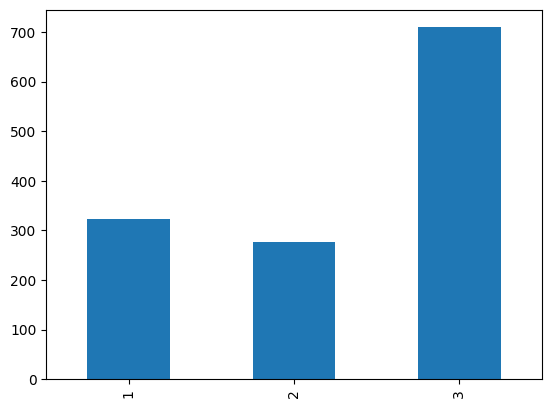

In [69]:
# Lets plot that in a bar graph!
titanic["pclass"].value_counts().sort_index().plot(kind="bar")

In [70]:
'''
Sort the series as a result of the .value_couts() method by values
    Then plot that
'''

titanic["pclass"].value_counts().sort_values()

2    277
1    323
3    709
Name: pclass, dtype: int64

<Axes: >

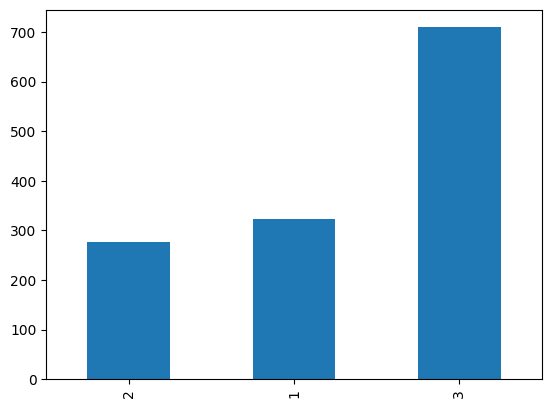

In [71]:
titanic["pclass"].value_counts().sort_values().plot(kind="bar")

### `DataFrame.loc[]`
+ Access a group of rows and columns by label(s) or a boolean array.

> `.loc[]` is **primarily label** based, but may also be used with a boolean array.

In [ ]:
happiness.loc[2] # ERROR! Cannot access the row by position index if the index column is a string

In [72]:
# Selecting a row by the string labels
happiness.loc["Kenya"] # Passing  a "single" label returns a series

Regional indicator                            Sub-Saharan Africa
Ladder score                                               4.607
Standard error of ladder score                             0.072
upperwhisker                                               4.747
lowerwhisker                                               4.466
Logged GDP per capita                                      8.361
Social support                                             0.688
Healthy life expectancy                                   60.704
Freedom to make life choices                               0.779
Generosity                                                 0.287
Perceptions of corruption                                  0.825
Ladder score in Dystopia                                    2.43
Explained by: Log GDP per capita                           0.603
Explained by: Social support                               0.508
Explained by: Healthy life expectancy                      0.385
Explained by: Freedom to 

In [ ]:
# Returns a Series A series:
type(happiness.loc["Kenya"])

In [73]:
happiness.loc[["Kenya"]] # Passing  a "list" of labels (using[[]]) returns a DataFrame

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Kenya,Sub-Saharan Africa,4.607,0.072,4.747,4.466,8.361,0.688,60.704,0.779,0.287,0.825,2.43,0.603,0.508,0.385,0.483,0.375,0.073,2.18


In [ ]:
# Returns a DataFrame:
type(happiness.loc[["Kenya"]])

In [74]:
# Select the rows where string-labels are Kenya, Uganda, Egypt & South Africa
happiness.loc[["Kenya", "Uganda", "Egypt", "South Africa"]]

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Kenya,Sub-Saharan Africa,4.607,0.072,4.747,4.466,8.361,0.688,60.704,0.779,0.287,0.825,2.43,0.603,0.508,0.385,0.483,0.375,0.073,2.180
Uganda,Sub-Saharan Africa,4.636,0.073,4.780,4.493,7.677,0.781,56.101,0.709,0.122,0.855,2.43,0.364,0.718,0.240,0.398,0.267,0.054,2.596
Egypt,Middle East and North Africa,4.283,0.045,4.371,4.195,9.367,0.750,61.998,0.749,-0.182,0.795,2.43,0.954,0.647,0.426,0.446,0.069,0.092,1.648
South Africa,Sub-Saharan Africa,4.956,0.060,5.074,4.839,9.403,0.860,56.904,0.749,-0.067,0.860,2.43,0.967,0.895,0.265,0.447,0.144,0.051,2.187


In [75]:
# Select the rows where integer-labels are 7, 9 & 876
titanic.loc[[7,9,876]]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"
876,3,0,"Ilieff, Mr. Ylio",male,?,0,0,349220,7.8958,?,S,?,?,?


In [76]:
'''
Selecting by slice a:h, or 3:15 for instance
  Note that unlike the native Python slice, values at both 3 & 15, a & h will be included with .loc[]
    (not the case with .iloc[])
'''
titanic.loc[5:10]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63,1,0,13502,77.9583,D7,S,10,?,"Hudson, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53,2,0,11769,51.4792,C101,S,D,?,"Bayside, Queens, NY"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"
10,1,0,"Astor, Col. John Jacob",male,47,1,0,PC 17757,227.525,C62 C64,C,?,124,"New York, NY"


In [77]:
# Give me values with the index label from 5-10, but jump by 2
titanic.loc[5:10:2]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
5,1,1,"Anderson, Mr. Harry",male,48,0,0,19952,26.55,E12,S,3,?,"New York, NY"
7,1,0,"Andrews, Mr. Thomas Jr",male,39,0,0,112050,0,A36,S,?,?,"Belfast, NI"
9,1,0,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,?,C,?,22,"Montevideo, Uruguay"


In [78]:
# A slice of countries
happiness.loc["Italy":"Kenya"] # Note: Would not work if the DataFrame was sorted in reverse (descending)

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Italy,Western Europe,6.483,0.045,6.572,6.395,10.623,0.880,73.800,0.693,-0.084,0.866,2.43,1.393,0.940,0.798,0.379,0.133,0.047,2.794
Ivory Coast,Sub-Saharan Africa,5.306,0.078,5.460,5.152,8.551,0.644,50.114,0.741,-0.016,0.794,2.43,0.669,0.409,0.052,0.438,0.177,0.092,3.469
Jamaica,Latin America and Caribbean,6.309,0.156,6.615,6.004,9.186,0.877,67.500,0.890,-0.137,0.884,2.43,0.891,0.932,0.599,0.618,0.099,0.035,3.135
Japan,East Asia,5.940,0.040,6.020,5.861,10.611,0.884,75.100,0.796,-0.258,0.638,2.43,1.389,0.949,0.838,0.504,0.020,0.192,2.048
Jordan,Middle East and North Africa,4.395,0.062,4.516,4.273,9.182,0.767,67.000,0.755,-0.167,0.705,2.43,0.890,0.685,0.583,0.455,0.079,0.150,1.553
Kazakhstan,Commonwealth of Independent States,6.152,0.047,6.243,6.060,10.155,0.952,65.200,0.853,-0.069,0.733,2.43,1.230,1.103,0.527,0.573,0.143,0.132,2.446
Kenya,Sub-Saharan Africa,4.607,0.072,4.747,4.466,8.361,0.688,60.704,0.779,0.287,0.825,2.43,0.603,0.508,0.385,0.483,0.375,0.073,2.180



### `DataFrame.iloc[]`
+ Purely integer-location based indexing for selection by position.  
> `.iloc[]` is primarily **integer position based** (from `0` to `length-1` of the `axis`), but may also be used with a boolean array.

In [ ]:
happiness.iloc[["Yemen"]] # ERROR! Cannot work with non-integer key (like .loc does)

In [79]:
# Return the row at INTEGER POSITION 3
happiness.iloc[[3]]

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Argentina,Latin America and Caribbean,5.929,0.056,6.04,5.819,9.962,0.898,69.0,0.828,-0.182,0.834,2.43,1.162,0.98,0.646,0.544,0.069,0.067,2.461


In [80]:
# Return the rows at INTEGER POSITION 10, 20, 30, 100
happiness.iloc[[10,20,30,100]]

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Belarus,Commonwealth of Independent States,5.534,0.047,5.625,5.442,9.853,0.910,66.253,0.650,-0.180,0.627,2.43,1.124,1.007,0.560,0.326,0.070,0.199,2.247
Cambodia,Southeast Asia,4.830,0.067,4.963,4.698,8.360,0.765,62.000,0.959,0.034,0.843,2.43,0.603,0.680,0.426,0.702,0.210,0.061,2.148
Croatia,Central and Eastern Europe,5.882,0.048,5.975,5.788,10.217,0.924,70.799,0.754,-0.118,0.939,2.43,1.251,1.039,0.703,0.453,0.111,0.000,2.325
Nigeria,Sub-Saharan Africa,4.759,0.052,4.861,4.658,8.533,0.740,50.102,0.737,0.037,0.878,2.43,0.663,0.625,0.051,0.433,0.212,0.039,2.736


In [81]:
# Return by passing a slice
happiness.iloc[50:55]

,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
Country name,,,,,,,,,,,,,,,,,,,
Haiti,Latin America and Caribbean,3.615,0.173,3.953,3.276,7.477,0.540,55.70,0.593,0.422,0.721,2.43,0.294,0.173,0.227,0.257,0.463,0.139,2.060
Honduras,Latin America and Caribbean,5.919,0.082,6.081,5.758,8.648,0.812,67.30,0.857,0.081,0.809,2.43,0.703,0.787,0.593,0.578,0.241,0.083,2.934
Hong Kong S.A.R. of China,East Asia,5.477,0.049,5.573,5.380,11.000,0.836,76.82,0.717,0.067,0.403,2.43,1.525,0.841,0.893,0.408,0.232,0.342,1.236
Hungary,Central and Eastern Europe,5.992,0.047,6.085,5.899,10.358,0.943,68.00,0.755,-0.186,0.876,2.43,1.301,1.083,0.615,0.454,0.067,0.040,2.432
Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.00,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967


In [82]:
# Assume we reversed the order of index for the houses DataFrame like such:
houses.sort_index(ascending=False)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639


In [83]:
houses.sort_index(ascending=False).loc[21612:21608]
# To show that .loc[] is purely LABEL BASED

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


In [84]:
houses.sort_index(ascending=False).iloc[0:5]
# To show that .iloc[] only cares about the POSITION. The labels DON'T matter

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509


### Specifying range of column(s) with `DataFrame.loc[]` and `DataFrame.iloc[]`
> One can specify the colum(s) to include when returning rows using `.loc[]` & `.iloc[]` like such:
  + `happiness.loc[["Kenya", "Egypt", "South Africa"],["Ladder score", "Healthy life expectancy", "Generosity"]]`
  + `happiness.iloc[0:5,["Ladder score", "Healthy life expectancy", "Generosity"]]`  

> The second list `["Ladder score", "Healthy life expectancy", "Generosity"]` specifies the columns to include

In [85]:
# To get the full list of columns on the world-happiness-report Dataset
happiness.columns

Index(['Regional indicator', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [86]:
# Specifying columns with .loc[]
happiness.loc[["Kenya", "Egypt", "South Africa"], ["Regional indicator", "Ladder score", "Healthy life expectancy",
                                                   "Generosity"]]

,Regional indicator,Ladder score,Healthy life expectancy,Generosity
Country name,,,,
Kenya,Sub-Saharan Africa,4.607,60.704,0.287
Egypt,Middle East and North Africa,4.283,61.998,-0.182
South Africa,Sub-Saharan Africa,4.956,56.904,-0.067


In [87]:
# A nifty method for returning the index of a particular column from the list of columns
happiness.columns.get_loc("Ladder score")

1

In [88]:
# Specifying columns with .iloc[] requires that columns are indexed as well
happiness.iloc[[3,4,5], [0,1,7,9]]

,Regional indicator,Ladder score,Healthy life expectancy,Generosity
Country name,,,,
Argentina,Latin America and Caribbean,5.929,69.000,-0.182
Armenia,Commonwealth of Independent States,5.283,67.055,-0.168
Australia,North America and ANZ,7.183,73.900,0.159


### `Series.loc[]` and `Series.iloc[]`
+ `Series.loc[]` - Return a group of values using labels

+ `Series.iloc[]` - Purely integer-location based indexing for selection by integer position.

In [89]:
"""
    Let's make a series containing the count of unique no. of bedrooms from the houses DataFrame
"""
houses["bedrooms"].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [90]:
# From the above Series, what value is in position 0?
houses["bedrooms"].value_counts().iloc[0]

9824

In [91]:
# From the above Series, what values are from position 0 - 2
houses["bedrooms"].value_counts().iloc[:3] # same result as: houses["bedrooms"].value_counts().iloc[0:3]

3    9824
4    6882
2    2760
Name: bedrooms, dtype: int64

In [92]:
# From the above Series, how many 7 bedroom houses were sold?
houses["bedrooms"].value_counts().loc[7]

38

In [93]:
"""
    Let's work with a Series from the titanic DataFrame,
"""
titanic["age"].value_counts()

?         263
24         47
22         43
21         41
30         40
         ... 
66          1
0.6667      1
76          1
67          1
26.5        1
Name: age, Length: 99, dtype: int64

In [94]:
# From the above Series, how many people were aged 18?
titanic["age"].value_counts().loc["18"]

39

In [95]:
# From the above Series, what were the top 5 most frequent ages?
titanic["age"].value_counts().iloc[:5]

?     263
24     47
22     43
21     41
30     40
Name: age, dtype: int64

# **Exercise Time!** 💪 💪 💪
---
> **Work with the `pokemon.csv` dataset to answer the following questions:**

### Part 1
* Make the Name column the index (do it in place on the original DataFrame!)

In [96]:
import pandas as pd
pokemon = pd.read_csv("/content/Pokemon.csv", index_col="Name")
pokemon.info()


<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, Bulbasaur to Mew
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Num        151 non-null    int64 
 1   Type 1     151 non-null    object
 2   Type 2     67 non-null     object
 3   Total      151 non-null    int64 
 4   HP         151 non-null    int64 
 5   Attack     151 non-null    int64 
 6   Defense    151 non-null    int64 
 7   Sp. Atk    151 non-null    int64 
 8   Sp. Def    151 non-null    int64 
 9   Speed      151 non-null    int64 
 10  Stage      151 non-null    int64 
 11  Legendary  151 non-null    bool  
dtypes: bool(1), int64(9), object(2)
memory usage: 14.3+ KB


### Part 2
* Sort the pokemon by the Attack column, from highest to lowest

In [97]:
pokemon.sort_values(["Attack"], ascending=False)

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Dragonite,149,Dragon,Flying,600,91,134,95,100,100,80,3,False
Rhydon,112,Ground,Rock,485,105,130,120,45,45,40,2,False
Flareon,136,Fire,NaN,525,65,130,60,95,110,65,2,False
Machamp,68,Fighting,NaN,505,90,130,80,65,85,55,3,False
Kingler,99,Water,NaN,475,55,130,115,50,50,75,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Kakuna,14,Bug,Poison,205,45,25,50,25,25,35,2,False
Abra,63,Psychic,NaN,310,25,20,15,105,55,90,1,False
Metapod,11,Bug,NaN,205,50,20,55,25,25,30,2,False


* Sort the pokemon by the Num column, from lowest to highest, in place

In [98]:
pokemon.sort_values(["Num"], ascending=True, inplace=True)

* Sort the pokemon by the Total column AND the Attack column (in that order!) from highest to lowest

In [99]:
pokemon.sort_values(["Total", "Attack"], ascending=False)

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Mewtwo,150,Psychic,NaN,680,106,110,90,154,90,130,1,True
Dragonite,149,Dragon,Flying,600,91,134,95,100,100,80,3,False
Mew,151,Psychic,NaN,600,100,100,100,100,100,100,1,False
Moltres,146,Fire,Flying,580,90,100,90,125,85,90,1,True
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
Kakuna,14,Bug,Poison,205,45,25,50,25,25,35,2,False
Metapod,11,Bug,NaN,205,50,20,55,25,25,30,2,False
Magikarp,129,Water,NaN,200,20,10,55,15,20,80,1,False


* Sort the pokemon by their index, from lowest to highest, in place (From A-Z)

In [100]:
pokemon.sort_index(ascending=False)

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Zubat,41,Poison,Flying,245,40,45,35,30,40,55,1,False
Zapdos,145,Electric,Flying,580,90,90,85,125,90,100,1,True
Wigglytuff,40,Normal,Fairy,435,140,70,45,85,50,45,2,False
Weezing,110,Poison,NaN,490,65,90,120,85,70,60,2,False
Weepinbell,70,Grass,Poison,390,65,90,50,85,45,55,2,False
...,...,...,...,...,...,...,...,...,...,...,...,...
Arcanine,59,Fire,NaN,555,90,110,80,100,80,95,2,False
Arbok,24,Poison,NaN,438,60,85,69,65,79,80,2,False
Alakazam,65,Psychic,NaN,500,55,50,45,135,95,120,3,False


### Part 3
* Find the average Speed of the 10 pokemon with the highest Speed

In [101]:
# pokemon["Speed"].sort_values(ascending=False).head(10).mean() # This could work too
pokemon["Speed"].nlargest(10).mean()

122.0


* Of the top 20 pokemon with the highest Attack values, what is the most common value for Type 1

In [102]:
#pokemon.sort_values(["Attack"], ascending=False).head(20)["Type 1"].mode() # Also works
pokemon.sort_values(["Attack"], ascending=False).head(20)["Type 1"].value_counts()

Fighting    4
Water       3
Fire        2
Bug         2
Rock        2
Normal      2
Dragon      1
Ground      1
Psychic     1
Grass       1
Poison      1
Name: Type 1, dtype: int64

### Part 4
* Retrieve the row with the index label of Diglett

In [103]:
# loc[] is label based
pokemon.loc[["Diglett"]]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Diglett,50,Ground,NaN,265,10,55,25,35,45,95,1,False


* Retrieve the rows for the two fox-like Pokemon: Eevee and Vulpix

In [104]:
pokemon.loc[["Eevee", "Vulpix"]]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Eevee,133,Normal,NaN,325,55,55,50,45,65,55,1,False
Vulpix,37,Fire,NaN,299,38,41,40,50,65,65,1,False


* Make sure your DataFrame is sorted by index (A-Z). Retrieve the rows from Charizard to Charmeleon. You should get three rows back.

In [105]:
pokemon.sort_index(ascending=True).loc["Charizard":"Charmeleon"]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Charizard,6,Fire,Flying,534,78,84,78,109,85,100,3,False
Charmander,4,Fire,NaN,309,39,52,43,60,50,65,1,False
Charmeleon,5,Fire,NaN,405,58,64,58,80,65,80,2,False


* Retrieve the 30th, 40th, and 50th rows by position.

In [106]:
pokemon.iloc[[30,40,50]]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Nidoqueen,31,Poison,Ground,505,90,92,87,75,85,76,3,False
Zubat,41,Poison,Flying,245,40,45,35,30,40,55,1,False
Dugtrio,51,Ground,NaN,405,35,80,50,50,70,120,2,False


### Part 5
* Retrieve the rows of the fish-like Pokemon.  Use this list to make it easier:
> `fish_pokemon = ["Magikarp", "Goldeen","Horsea", "Seaking", "Seadra", "Gyarados"]`

In [107]:
fish_pokemon = ["Magikarp", "Goldeen","Horsea", "Seaking", "Seadra", "Gyarados"]
pokemon.loc[fish_pokemon]

,Num,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
Name,,,,,,,,,,,,
Magikarp,129,Water,NaN,200,20,10,55,15,20,80,1,False
Goldeen,118,Water,NaN,320,45,67,60,35,50,63,1,False
Horsea,116,Water,NaN,295,30,40,70,70,25,60,1,False
Seaking,119,Water,NaN,450,80,92,65,65,80,68,2,False
Seadra,117,Water,NaN,440,55,65,95,95,45,85,2,False
Gyarados,130,Water,Flying,540,95,125,79,60,100,81,2,False


### Part 6
* Create this bar chart that shows the Attack values for the above fish-like Pokemon.  Pay attention to the sorting!!

<Axes: title={'center': 'Attack Value vs Pokemon Names'}, xlabel='Pokemon Names', ylabel='Attack Value'>

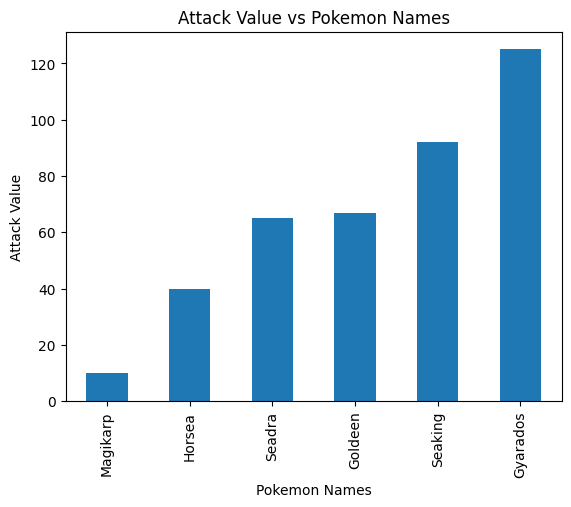

In [108]:
fish_pokemon = ["Magikarp", "Goldeen","Horsea", "Seaking", "Seadra", "Gyarados"]
pokemon.loc[fish_pokemon]["Attack"].sort_values().plot(kind="bar", xlabel="Pokemon Names", ylabel="Attack Value", title="Attack Value vs Pokemon Names")